![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [91]:
# importando bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
# importando a base de dados

data_train = pd.read_csv('/content/drive/MyDrive/human-activity-train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/human-activity-test.csv')

In [94]:
# separando a base das varriáveis explicativas da variável alvo

y_train = data_train['Activity']
X_train = data_train.iloc[:,:-1]

y_test = data_test['Activity']
X_test = data_test.iloc[:,:-1]

## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

In [95]:
# criando função para retornar gráficos para análise das variâncias em PCA

''' Parâmetros da função: base de dados, % da variância,
    dados vadronizados sim/não '''

def comparativo_var(data, porcentagem_var, padr=''):

  pca = PCA()

  n_componentes = data.shape[1] # número de componentes

  princomp = pca.fit(data)

  fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
  plt.subplots_adjust(hspace=0, wspace=.15)

  # Número de componentes para explicar % da variância
  varexplicada = porcentagem_var
  ncomp_criterio3 = (princomp.explained_variance_ratio_.cumsum()<varexplicada).sum()+1

  # A variância explicada por componente
  num_componentes = np.arange(princomp.n_components_) + 1
  ax[0,0].plot(num_componentes, princomp.explained_variance_, 'X-', linewidth=1, color='black', markersize=2, alpha=.2)
  ax[0,0].set_title('Análise de variância ' + padr + ' padronizada')
  ax[0,0].set_xlabel('Número de componentes')
  ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

  # A variância explicada acumulada por componente
  ax[1,0].plot(num_componentes, princomp.explained_variance_.cumsum(), 'X-', linewidth=1, color='black', markersize=2, alpha=.2)
  ax[1,0].set_xlabel('Número de componentes')
  ax[1,0].set_ylabel('Variancia explicada (Acumulada)')

  # A variância percentual acumulada por componente
  ax[0,1].plot(num_componentes, princomp.explained_variance_ratio_, 'X-', linewidth=1, color='black', markersize=2, alpha=.2)
  ax[0,1].set_title('Análise de variância ' + padr + ' padronizada - percentual')
  ax[0,1].set_xlabel('Número de componentes')
  ax[0,1].set_ylabel('Variancia explicada (percentual)')

  # A variância percentual acumulada por componente
  ax[1,1].plot(num_componentes, princomp.explained_variance_ratio_.cumsum(), 'X-', linewidth=1, color='black', markersize=2, alpha=.2)
  ax[1,1].set_xlabel('Número de componentes')
  ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')

  # linhas verticais de referência
  ax[0,0].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)
  ax[1,1].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)
  ax[1,0].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)
  ax[0,1].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)

  # linhas horizontais
  ncomp_criterio2 = 50
  ax[0,0].axhline(y = princomp.explained_variance_[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)
  ax[1,0].axhline(y = princomp.explained_variance_.cumsum()[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)
  ax[0,1].axhline(y = princomp.explained_variance_ratio_[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)
  ax[1,1].axhline(y = princomp.explained_variance_ratio_.cumsum()[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)

  print('Quantidade mínima de componentes que explicam 90% da variância:', ncomp_criterio3)

  return plt.show()

Quantidade mínima de componentes que explicam 90% da variância: 7


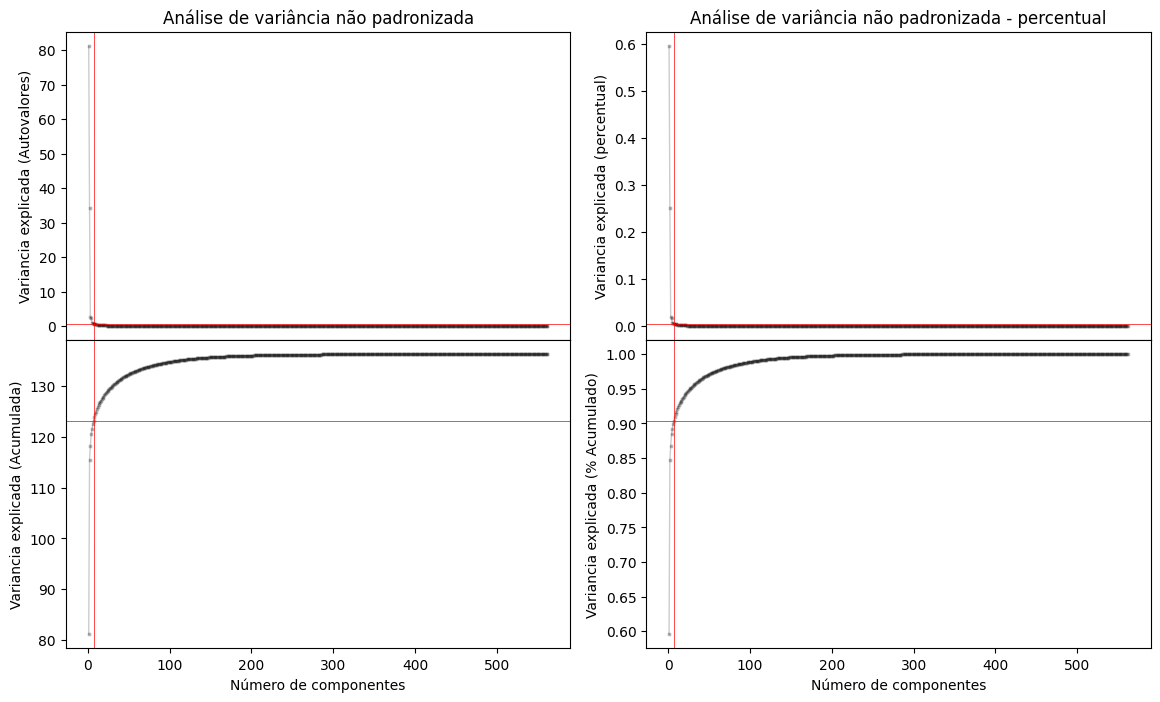

In [96]:
# análise das variâncias não padronizadas

comparativo_var(X_train, 0.9, 'não')

**Quantas componentes você escolheria para explicar 90% da variância?**

*Para dados não padronizados, escolheria 7, como indica o resultado acima*



In [97]:
%%time

# função para padronizar variâncias PCA

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s


CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 12.2 µs


In [98]:
# padronizando dados PCA

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)

X_test_pad = pd.DataFrame(X_test).apply(padroniza, axis=0)


Quantidade mínima de componentes que explicam 90% da variância: 64


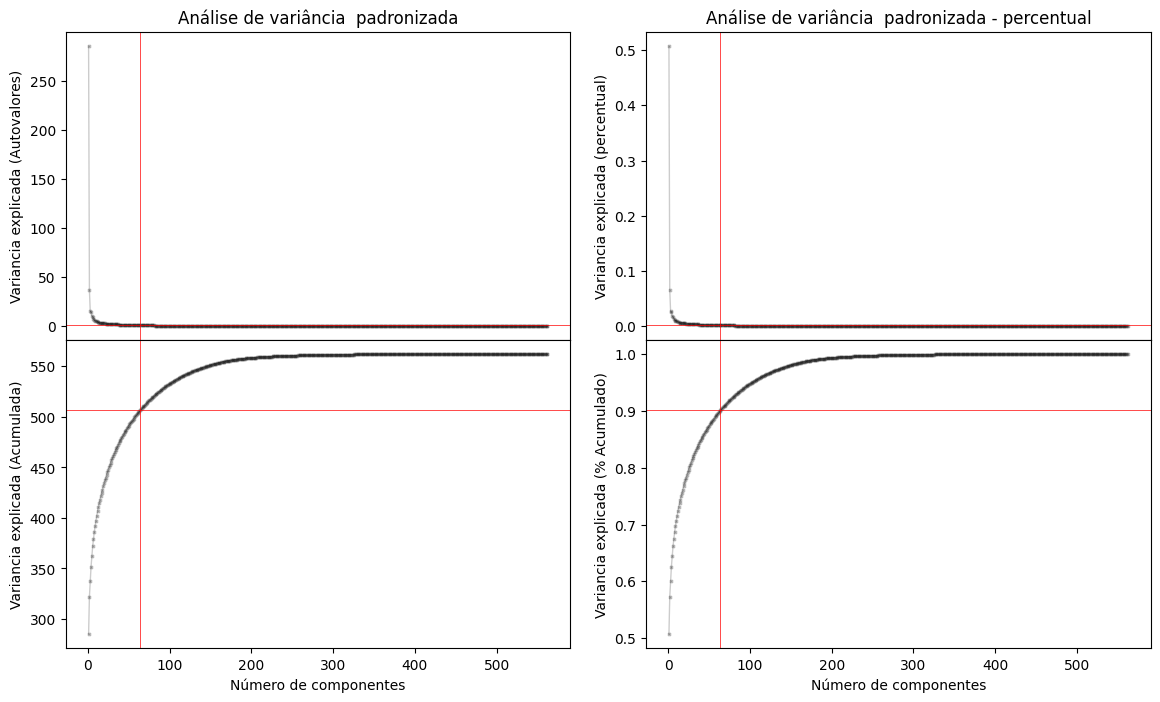

In [99]:
# análise da variância padronizada PCA

comparativo_var(X_train_pad, 0.9)

**Quantas componentes você escolheria para explicar 90% da variância?**

*Para dados padronizados, escolheria 64, como indica o resultado acima*

## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

In [100]:
%%time

#treinando modelo com dados não padronizados

pca = PCA(n_components=10).fit(X_train)

pca_train = pca.transform(X_train)
pca_test = pca.transform(X_test)


CPU times: user 705 ms, sys: 503 ms, total: 1.21 s
Wall time: 647 ms


In [101]:
# apurando scores com dados não padronizados

arv = DecisionTreeClassifier(random_state=2360873, ccp_alpha=0.001)

arv.fit(pca_train, y_train)

print('acurária da árvore na base treino:', arv.score(pca_train, y_train))

print('acurária  da árvore na base teste:', arv.score(pca_test, y_test))


acurária da árvore na base treino: 0.8989390642002176
acurária  da árvore na base teste: 0.8116728876823889


In [102]:
# treinando modelo com dados padronizados

pca = PCA(n_components=10).fit(X_train_pad)

pca_train_pad = pca.transform(X_train_pad)
pca_test_pad = pca.transform(X_test_pad)

In [103]:
# apurando scores com dados padronizados

arv_pad = DecisionTreeClassifier(random_state=2360873, ccp_alpha=0.001)

arv_pad.fit(pca_train_pad, y_train)

print('acurária da árvore na base treino padronizada:', arv_pad.score(pca_train_pad, y_train))

print('acurária da ´árvore na base teste padronizada:', arv_pad.score(pca_test_pad, y_test))

acurária da árvore na base treino padronizada: 0.8643906420021763
acurária da ´árvore na base teste padronizada: 0.7794367153036986
